# Binary Heaps 

* Are trees, but represented in an array
* Can have at most two children;
* A binary heap is very similar to a binary search tree;
* In a **MaxBinaryHeap**, parent nodes are always larger than child nodes;
* In a **MinBinaryHeap**, parent nodes are always smaller than child nodes;
* Is at compact as possible. All the chidren of each node are as full as they can be
and left children are filled out first;
* Are used to implement Priority Queues and do graph traversals.
* For any index of an array n, the left child is stored at 2*n+1 and the right child 
is stored at 2n+2;
* For any child node at index n, its parent is at index (n-1)//2


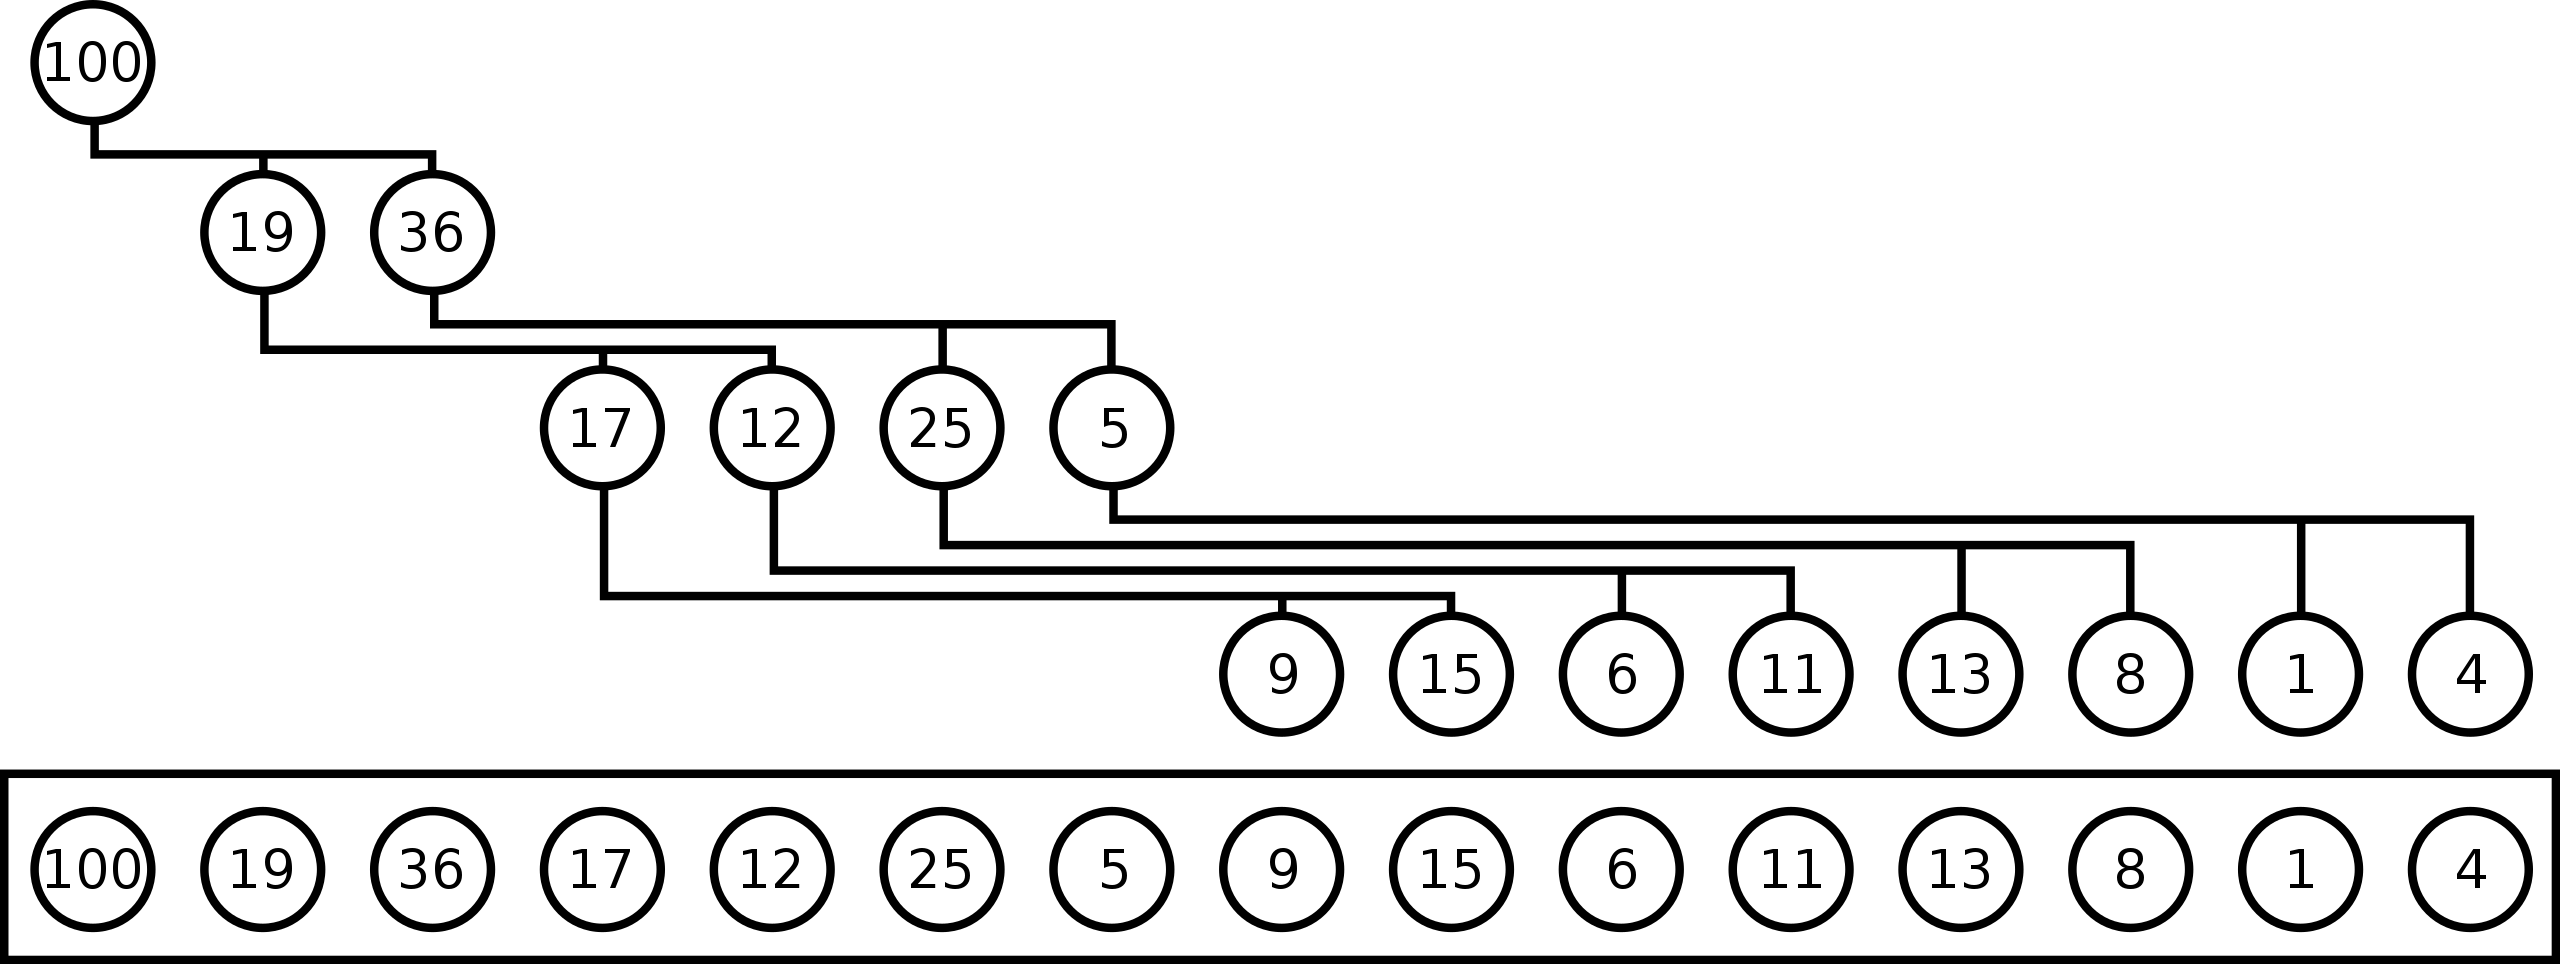




### Max Heap Construction Algorithm
* Step 1 − Create a new node at the end of heap.
* Step 2 − Assign new value to the node.
* Step 3 − Compare the value of this child node with its parent.
* Step 4 − If value of parent is less than child, then swap them.
* Step 5 − Repeat step 3 & 4 until Heap property holds.


![](https://www.tutorialspoint.com/data_structures_algorithms/images/max_heap_animation.gif)

### Max Heap Deletion Algorithm

* Step 1 − Remove root node.
* Step 2 − Move the last element of last level to root.
* Step 3 − Compare the value of this child node with its parent.
* Step 4 − If value of parent is less than child, then swap them.
* Step 5 − Repeat step 3 & 4 until Heap property holds.

![](https://www.tutorialspoint.com/data_structures_algorithms/images/max_heap_deletion_animation.gif)

### Big O of Binary heaps

* Insertion - O(log n)
* Removal - O(log n)
* Search - O(n/2)
* Worst case - O(log n) unlike BST that is O(n)


In [57]:
# Colt Steele code
class MaxBinaryHeap(object):

    def __init__(self):
        #55,39,41,18,27,12,33
        self.values = [33]
 
    # Push to the end of the values property
    # Bubble it up to its correct spot
    # How to bubble up
    # Create a variable called index which is the len of the values property -1
    # Create a variable called parentIndex which is the floor of (index-1)/2
    # Keep looping as long as the values element at the parentIndex is less than the values element at the child index
        # Swap the value of values element at the parentIndex with the value at the child index
        # Set the index to be the parentindex, and start over
    def insert(self, value):
        self.values.append(value)
        self._bubbleUp()
 
    def _bubbleUp(self):
        index = len(self.values)-1
        element = self.values[index]
        while index > 0:
            parentIndex = (index-1)//2
            if self.values[index] > self.values[parentIndex]:
                self.values[parentIndex], self.values[index] = self.values[index], self.values[parentIndex]
                index = parentIndex
            else: 
                return
     
    # Remove the root
    # Swap the first value in the values property with the last one
    # Pop from the values property, so you can return the vale at the end
    # Have the new root "bubble down" 
    # How to "bubble down"
        # Parent index starts at 0 (the root)
        # Find the index of the left child: 2*index+1 (make sure it's not out of bounds)
        # Find the index of the right child: 2*index+2 (make sure it's not out of bounds)
        # If the left or right child is greater than the element...swap. If both left and
        # and right are larger, swap with the largest child.
        # The child index you swapped to now becomes the new parent index
        # Keep looping and swapping until neither child is larger than the element
        # Return the old root     
    
    def remove(self):
        if not self.values: return 
        if len(self.values) == 1: return self.values.pop()
        self.values[len(self.values) - 1], self.values[0] = self.values[0], self.values[len(self.values) - 1]
        root = self.values.pop()
        self._bubbleDown()      
        return root
        
    
    def _bubbleDown(self):
        index = 0
        length = len(self.values)
        element = self.values[0]
        while True:
            leftIndex = 2 * index + 1
            rightIndex = 2 * index + 2
            leftChild = rightChild = swap = None
            
            
            if leftIndex < length:
                leftChild = self.values[leftIndex]
                if (leftChild > element):
                    swap = leftIndex
            if rightIndex < length:
                rightChild = self.values[rightIndex]
                if (not swap and rightChild > element) or\
                (swap and rightChild > leftChild):
                     swap = rightIndex
            
            if not swap: break
                 
            self.values[index], self.values[swap] = self.values[swap], self.values[index]
            index = swap
                 
       
                 
                 
                 

In [58]:
heap = MaxBinaryHeap()

In [59]:
heap.values

[33]

In [61]:
heap.remove()

In [55]:
heap.values

[]

In [23]:
heap.insert(100)

In [24]:
heap.values

[100, 55, 41, 39, 44, 12, 33, 7, 18, 27]

# Priority Queue

* A data structure where each element has a priority
* Elements with higher priorities are served before elements with lower priorities
* Lower number denotes higher priority



In [91]:
# Colt Steele code
class Node(object):
    def __init__(self, val, priority):
        self.val = val
        self.priority = priority

class PriorityQueue (object):
    
    # Write a Min Binary Heap - Lower number means higher priority
    # Each node has a val and a priority. Use the priority to build the heap
    # Enqueue method accepts a value and priority, makes a new node, 
    # and puts it in the right spot based off of its priority
    # Dequeue method removes root element, returns it, 
    # and rearranges heap using priority

    def __init__(self):
        self.values = []
 
    def enqueue(self, val, priority):
        newNode = Node(val, priority)
        self.values.append(newNode)
        self.bubbleUp()
 
    def bubbleUp(self):
        index = len(self.values)-1
        element = self.values[index]
        while index > 0:
            parentIndex = (index-1)//2
            parent = self.values[parentIndex]
            if element.priority <= parent.priority:
                self.values[parentIndex], self.values[index] = self.values[index], self.values[parentIndex]
                index = parentIndex
            else: 
                return
     
    def dequeue(self):
        if not self.values: return 
        if len(self.values) == 1: return self.values.pop()
        self.values[len(self.values) - 1], self.values[0] = self.values[0], self.values[len(self.values) - 1]
        root = self.values.pop()
        self.bubbleDown()      
        return root
        
    
    def bubbleDown(self):
        index = 0
        length = len(self.values)
        element = self.values[0]
        while True:
            leftIndex = 2 * index + 1
            rightIndex = 2 * index + 2
            leftChild = rightChild = swap = None
            
            
            if leftIndex < length:
                leftChild = self.values[leftIndex]
                if (leftChild.priority < element.priority):
                    swap = leftIndex
            if rightIndex < length:
                rightChild = self.values[rightIndex]
                if (not swap and rightChild.priority < element.priority) or\
                (swap and rightChild.priority < leftChild.priority):
                     swap = rightIndex
            
            if not swap: break
                 
            self.values[index], self.values[swap] = self.values[swap], self.values[index]
            index = swap
                 

In [84]:
ER = PriorityQueue()

In [85]:
ER.enqueue('common cold', 5)
ER.enqueue('GSW', 1)
ER.enqueue('High Fever', 4)
ER.enqueue('Broken arm', 2)
ER.enqueue('Glass in foot', 3)

In [90]:
ER.dequeue().val

'common cold'

In [2]:
# Binary Heap
# My implementation

class minBinaryHeap:
    def __init__(self):
        # 2, 3, 17, 19, 36, 7, 25, 100
        self.heapList = [3,2,1,5,6,4]
       
    def insert(self, k):
        self.heapList.append(k)
        self.percUp()
    
    def percUp(self):
        i = len(self.heapList)-1
        while (i-1) // 2 >= 0:
            if self.heapList[(i-1)//2] > self.heapList[i]:
                self.heapList[(i-1)//2], self.heapList[i] = self.heapList[i], self.heapList[(i-1)//2]
            else: break
            i = (i-1)//2
            
    def remove(self):
        last = len(self.heapList)-1
        if len(self.heapList) == 0: return 
        if len(self.heapList) == 1: self.heapList.pop()  
        self.heapList[0], self.heapList[last] = self.heapList[last], self.heapList[0]
        root = self.heapList.pop()
        self.percDown()
        return root
    
    def percDown(self):
        i = 0
        element = self.heapList[i]
        size = len(self.heapList)-1
        while True: 
            left, right = 2*i+1, 2*i+2
            swap = None
            if left < size: 
                if self.heapList[left] < element:
                    swap = left
            if right < size: 
                if self.heapList[right] < self.heapList[left]:
                    swap = right
            if not swap: return 
            
            self.heapList[i], self.heapList[swap] = self.heapList[swap], self.heapList[i] 
            i = swap 
    

In [3]:
mbh = minBinaryHeap()
mbh.heapList

[]

In [9]:
mbh.insert(4)
mbh.heapList

[1, 3, 2, 5, 6, 4]

In [296]:
mbh.remove()


1

In [297]:
mbh.heapList

[2, 3, 17, 19, 36, 7, 25, 100]

# 215. Kth Largest Element in an Array

Find the kth largest element in an unsorted array. Note that it is the kth largest element in the sorted order, not the kth distinct element.

Example 1:

Input: [3,2,1,5,6,4] and k = 2
Output: 5
Example 2:

Input: [3,2,3,1,2,4,5,5,6] and k = 4
Output: 4

In [63]:
import heapq
def findKthLargest(nums, k):
    
    first_k = nums[:k]
    heapq.heapify(first_k)
    print(first_k)
    if len(nums) > k:
        for n in nums[k:]:
            print(n)
            if n > first_k[0]:
                heapq.heapreplace(first_k, n)
                print(first_k)
    return first_k[0]
   
def findKthLargest(nums, k):
    return sorted(nums)[-k]
        

    
        
    
    

In [64]:
nums = [3,2,3,1,2,4,5,5,6]
k = 4
findKthLargest(nums, k)

4

# 378. Kth Smallest Element in a Sorted Matrix

Given a n x n matrix where each of the rows and columns are sorted in ascending order, find the kth smallest element in the matrix.

Note that it is the kth smallest element in the sorted order, not the kth distinct element.



In [22]:
import heapq

# def kthSmallest(matrix, k):
#         """
#         :type matrix: List[List[int]]
#         :type k: int
#         :rtype: int
#         """
#         out = []
#         for row in range(len(matrix)): 
#             out += matrix[row]
#         return sorted(out)[k-1]

def kthSmallest(matrix, k):
        """
        :type matrix: List[List[int]]
        :type k: int
        :rtype: int
        """
        
        heap = [(matrix[0][i], 0, i) for i in range(len(matrix))]
        
        
        for i in range(1, k):
            v, r, c = heapq.heappop(heap)
            if r + 1 < len(matrix):
                heapq.heappush(heap, (matrix[r+1][c], r+1, c))
        return heapq.heappop(heap)[0]
        
        
       
        
            
        


In [25]:
# matrix = [
#    [ 1,  5,  9],
#    [10, 11, 13],
#    [12, 13, 15]
# ]
# k = 8

# matrix = [[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]]
# k = 5

matrix = [[-5]]
k = 1

# matrix = [[1,2],[1,3]]
# k = 3
kthSmallest(matrix, k)


-5

# 239. Sliding Window Maximum
Hard

Given an array nums, there is a sliding window of size k which is moving from the very left of the array to the very right. You can only see the k numbers in the window. Each time the sliding window moves right by one position. Return the max sliding window.

Example:

Input: nums = [1,3,-1,-3,5,3,6,7], and k = 3
Output: [3,3,5,5,6,7] 
Explanation: 

Window position                Max
---------------               -----
[1  3  -1] -3  5  3  6  7       3

1 [3  -1  -3] 5  3  6  7       3

1  3 [-1  -3  5] 3  6  7       5

1  3  -1 [-3  5  3] 6  7       5

1  3  -1  -3 [5  3  6] 7       6
 
 1  3  -1  -3  5 [3  6  7]      7

In [77]:
#O(2n)
def maxSlidingWindow(nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
    
        output = []
        winSum = 0

        for i, num in enumerate(nums):
            winSum += max(nums[i:i+k])
            output.append(winSum)
            if i+k == len(nums):
                break
            winSum = 0
        return output



In [78]:
nums = [1,3,-1,-3,5,3,6,7]
k = 3
maxSlidingWindow(nums, k)


[3, 3, 5, 5, 6, 7]

In [1]:
# O(n) Using deque
def maxSlidingWindow(nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
        import collections
        deque = collections.deque() 
        out = []
        j = 0
        
        for i in range(len(nums)):
            if i-j == k: 
                deque.popleft()
            while deque and nums[i] > nums[deque[-1]]:
                deque.pop()
            deque.append(i)
            if i+1 >= k:
                j = deque[0]
                out.append(nums[j])
                
        return out 
    
    
            

In [75]:
nums = [1]
k = 0
maxSlidingWindow(nums, k)


[1]

# 295. Find Median from Data Stream

Median is the middle value in an ordered integer list. If the size of the list is even, there is no middle value. So the median is the mean of the two middle value.

For example,
[2,3,4], the median is 3

[2,3], the median is (2 + 3) / 2 = 2.5

Design a data structure that supports the following two operations:

void addNum(int num) - Add a integer number from the data stream to the data structure.
double findMedian() - Return the median of all elements so far.
 

Example:

addNum(1)
addNum(2)
findMedian() -> 1.5
addNum(3) 
findMedian() -> 2
 

Follow up:

If all integer numbers from the stream are between 0 and 100, how would you optimize it?
If 99% of all integer numbers from the stream are between 0 and 100, how would you optimize it?

In [57]:
from heapq import *
class MedianFinder(object):
    

    def __init__(self):
        """
        initialize your data structure here.
        """
        
        self.min_heap = []
        self.max_heap = []
            
        
    
    def addNum(self, num):
        """
        :type num: int
        :rtype: void
        """
        if len(self.min_heap) == len(self.max_heap):
            heappush(self.max_heap, -heappushpop(self.min_heap, -num))
        else:
            heappush(self.min_heap, -heappushpop(self.max_heap, num))
            
        
    def findMedian(self):
        """
        :rtype: float
        """
        if len(self.max_heap) > len(self.min_heap):
            return float(self.max_heap[0])
        else: 
            return (self.max_heap[0]-self.min_heap[0]) / 2.0 
        
        


In [58]:
obj = MedianFinder()

In [59]:
obj.addNum(1)

In [60]:
obj.addNum(2)

In [61]:
obj.findMedian()

1.5

In [62]:
class MedianFinder(object):

    def __init__(self):
        self.list = []  

    def addNum(self, num):
        bisect.insort(self.list, num)

    #Keep in mind that the O(log n) search is dominated by the slow O(n) insertion step.
    def findMedian(self):
        l = len(self.list)
        if l % 2 == 0:
            i = l / 2
            return (self.list[i] + self.list[i-1]) / float(2)
        return float(self.list[(l-1)/2])